In [1]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np
import scipy
from joblib import dump, load
from sklearn.preprocessing import PolynomialFeatures, Normalizer, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge, LassoCV, LogisticRegression

In [2]:
# First, let’s examine the data itself and see what we can learn from it before starting training our model.

In [3]:
df = pd.read_csv('csvs/hearing_test.csv')
df_copy = df.copy()
df_copy.head()

,age,physical_score,test_result
0,33.0,40.7,1
1,50.0,37.2,1
2,52.0,24.7,0
3,56.0,31.0,0
4,35.0,42.9,1


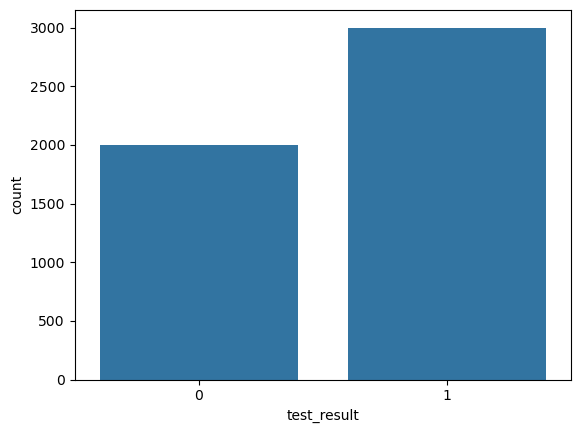

In [4]:
sns.countplot(data=df_copy, x=df['test_result'])
plt.show()

In [5]:
# Let’s explore the correlation between the features and the test result:

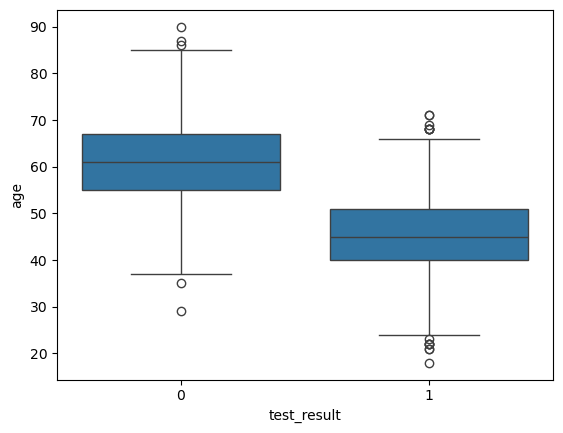

In [6]:
sns.boxplot(data=df_copy, x=df['test_result'], y='age')
plt.show()

In [7]:
# We can see that younger aged people
# are more likely to successfully pass the
# test then older age people

<Axes: xlabel='age', ylabel='physical_score'>

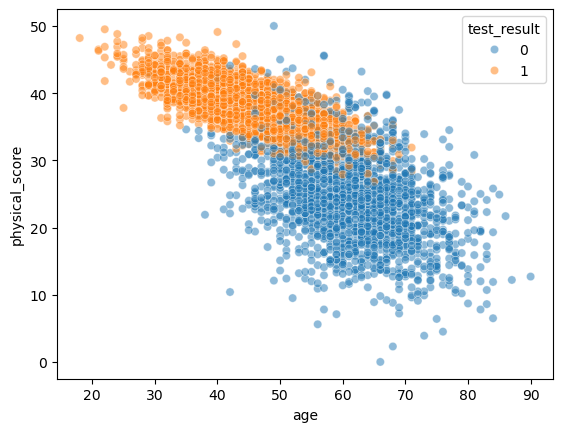

In [8]:
sns.scatterplot(data=df_copy, x='age', y='physical_score', hue='test_result', alpha=0.5)

In [9]:
# We can see that younger people tend to get
# higher physical score and people with high
# physical score are more likely to successfully
# pass the test.

In [10]:
# The class is now finished for today, 12/02.

In [11]:
# Missed last class..

In [12]:
# Now, let’s perform logistic regression on our data in order to predict future test results.
# For that we need to import the LogisticRegression() model and perform some data processing. 

In [13]:
X = df_copy.drop('test_result', axis=1)
y = df['test_result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [14]:
# Once we train our model, we can see the model beta coefficient values and predictions:

In [15]:
log_model.coef_

array([[-0.95017725,  3.46148946]])

In [16]:
# For a negative coefficient for the ‘age’
# feature, meaning the higher the age the less
# likelihood to get 1 result (pass the test)

# For a positive coefficient for the ‘physical score’
# feature, meaning the higher the physical score the
# more likelihood to get 1 result (pass the test)

In [17]:
y_prediction = log_model.predict(scaled_X_test)
y_prediction

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [18]:
# Printing the model predictions on the test dataset
# will give us values of 0 and 1 which indicate the
# model predictions of the person to pass or not

In [19]:
y_prediction = log_model.predict_proba(scaled_X_test)
y_prediction

array([[3.08819003e-02, 9.69118100e-01],
       [3.45737285e-02, 9.65426272e-01],
       [9.89875418e-01, 1.01245820e-02],
       [2.63180839e-03, 9.97368192e-01],
       [9.76848928e-01, 2.31510715e-02],
       [9.90320228e-01, 9.67977240e-03],
       [9.16799208e-02, 9.08320079e-01],
       [2.23525613e-02, 9.77647439e-01],
       [9.97145939e-01, 2.85406074e-03],
       [4.21052240e-02, 9.57894776e-01],
       [1.02112707e-01, 8.97887293e-01],
       [1.32056491e-02, 9.86794351e-01],
       [9.51044230e-03, 9.90489558e-01],
       [9.41081630e-01, 5.89183697e-02],
       [1.73203558e-04, 9.99826796e-01],
       [8.23130425e-02, 9.17686958e-01],
       [9.89692418e-01, 1.03075818e-02],
       [3.84855552e-03, 9.96151444e-01],
       [7.96524331e-04, 9.99203476e-01],
       [9.96627980e-01, 3.37201992e-03],
       [8.93444241e-01, 1.06555759e-01],
       [1.57457019e-01, 8.42542981e-01],
       [5.84352270e-01, 4.15647730e-01],
       [4.37029664e-02, 9.56297034e-01],
       [4.395704

In [20]:
# The first value is the probability of getting 0 and
# the second value is the probability of getting 1
# (Which is 1 - P(0)) 

In [21]:
# Classification Metrics - Python Example

In [22]:
y_pred = log_model.predict(scaled_X_test)

accuracy_score(y_test, y_pred)

0.924

In [23]:
# Our model accuracy is 0.924 meaning
# 92.4% of our model predictions are the
# correct predictions

In [24]:
confusion_matrix(y_test, y_pred)

array([[173,  20],
       [ 18, 289]])

In [25]:
# We have the following results:
# 172 - TP, 21 - FP
# 14 - FN, 293 - TN

In [26]:
# We can also plot a heatmap (using seaborn.heatmap() method) that will show the confusion matrix as a
# plot so it will be more readable:

In [27]:
# We are passing to the heatmap() method the following
# parameters:
# cm → The confusion matrix, the heatmap data source.
# annot → Determine if to write the data value in each cell.
# fmt → Determine the data formatting code (“d” means
# base-10 integer)
# cmap → determine the colors for the heatmap

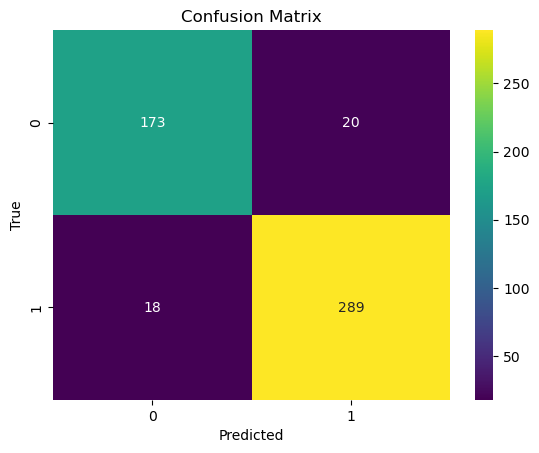

In [28]:
cm = confusion_matrix(y_test, y_pred)

cmap = plt.cm.viridis

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [29]:
# The plot result is the same confusion matrix from
# previously but plotting in a more readable way

In [30]:
# In order to see the recall and f1-score of our model we need to execute the following:

In [31]:
recall_score(y_test, y_pred)

0.9413680781758957

In [32]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

f1_score = 2 * (precision * recall) / (precision + recall)
f1_score

0.9383116883116883

In [33]:
# Our model f1-score metric is 0.9383116883116883

In [34]:
# We can also generate classification_report that will provide all classification metrics (precision, recall,
# f1-score) on each class separately

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90       193
           1       0.94      0.94      0.94       307

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500



In [36]:
# Using the classification_report we can see
# for the 0 class and for the 1 class all the
# metrics values (precision, recall and
# f1-score)

In [37]:
# Class Exercise - Logistic Regression
# Instructions:
# Use the ‘titanic’ dataset provided by Seaborn library, Your mission is to predict if future passengers will
# likely to survive the titanic or not.
# Perform Logistic Regression machine learning modeling with the following instructions:
# ● Get the ‘titanic’ data set by running the following command:
# titanic = sns.load_dataset("titanic")

In [38]:
titanic = sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [39]:
# Create a new dataset continuing only the following columns: ‘age’, ‘fare’, ‘survived’
# The new dataset will provide data about each passenger in the titanic, the data will contain the
# passenger age, sex and the ticket price. In addition the ‘survived’ column determine if the
# passenger managed to survive or not

In [40]:
titanic_df = titanic.loc[:, ['age', 'fare', 'survived']]

In [41]:
titanic_df.dropna(inplace=True)

In [42]:
# Apply simple Logistic Regression to predict likelihood of survivor

In [43]:
X = titanic_df.drop('survived', axis=1)
y = titanic_df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [44]:
# Print your model prediction, Accuracy, Precision, Recall and F1-score metrics

In [45]:
y_pred = log_model.predict(scaled_X_test)

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.55      0.92      0.69        37
           1       0.70      0.20      0.31        35

    accuracy                           0.57        72
   macro avg       0.62      0.56      0.50        72
weighted avg       0.62      0.57      0.50        72



In [47]:
# Plot your model confusion matrix

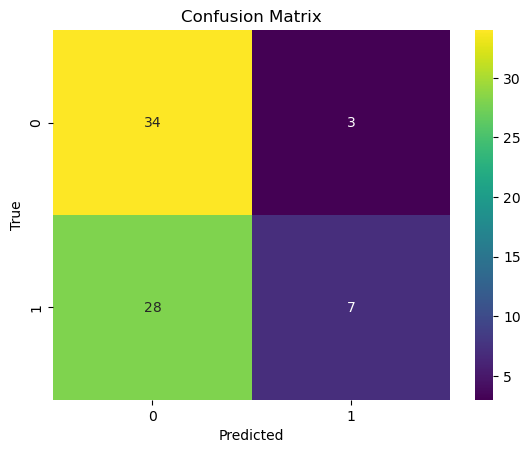

In [48]:
cm = confusion_matrix(y_test, y_pred)

cmap = plt.cm.viridis

sns.heatmap(cm, annot=True, fmt="d", cmap=cmap)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

In [49]:
# In case your model is not accurate enough, think about ways to improve it (no need to change
# the code but just think about actions that could improve your model prediction)

In [50]:
# Our prediction are not good at all !